In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

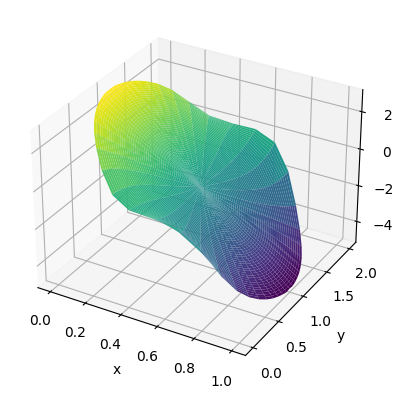

In [32]:
V0 = 0
a = 1
b = 2
V1=3
V2 = -5

def calcR(angle):
  return 1/(np.sqrt((np.cos(angle)/(a/2))**2 + (np.sin(angle)/(b/2))**2))
def stretch_mesh(r, theta):
  return [ r[i] * calcR(theta[i][0]) for i in range(len(r)) ]

theta = np.linspace(0, 2*np.pi, 50)
r = np.linspace(0, 1, 50)

r, theta = np.meshgrid(r, theta)
r1= stretch_mesh(r,theta)

def Vn1(n):
  return( V1 + ((-1)**n)*(V0-V1))

def Vn2(n):
  return( V2 + ((-1)**n)*(V0-V2))
def V(x,y):
  n = 100
  R = V0/b
  for i in range(1,n):
    R += (2/np.pi)*(1/(i*np.sinh(i*np.pi*a/b)))*(Vn2(i)*np.sinh(i*np.pi*(x/b))-Vn1(i)*np.sinh((i*np.pi/b)*(x-a)))*np.sin(i*np.pi*y/b)
  return(R)

X = r1 * np.cos(theta) + a/2
Y = r1 * np.sin(theta) + b/2

Z= V(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v')

plt.show()

In [33]:
v = np.zeros((52,52))

x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)

hx = x[1]-x[0]
hy = y[1]-y[0]

print(hx,hy)

V0 = 0
a = 1
b = 2
V1=3
V2 = -5

v[:,0] = V1
v[:,-1] = V2

0.02040816326530612 0.04081632653061224


In [34]:
for i in range(10000):
  v1 = v[1:-1,1:-1]
  vi = v[:-2,1:-1]
  vd = v[2:,1:-1]
  va = v[1:-1,:-2]
  vab = v[1:-1,2:]

  v1 = ((vi+vd)*hy**2 + (va+vab)*hx**2)/(2*(hx**2 + hy**2))

  v[1:-1,1:-1] = v1

In [35]:
X, Y = np.meshgrid(x, y)

Xa = X-a/2
Ya = Y-b/2

ra = np.sqrt(Xa**2 + Ya**2)

cos = Xa/ra
sin = Ya/ra
x2 = (a/2)*cos
y2 = (b/2)*sin

ii1 = np.abs(Xa) <= np.abs(x2)
ii2 = np.abs(Ya) <= np.abs(y2)
ii = ii1*ii2

Z = v[1:-1,1:-1]

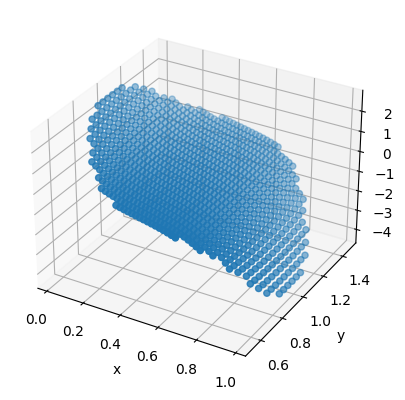

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[ii], Y[ii], Z[ii])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v')

plt.show()

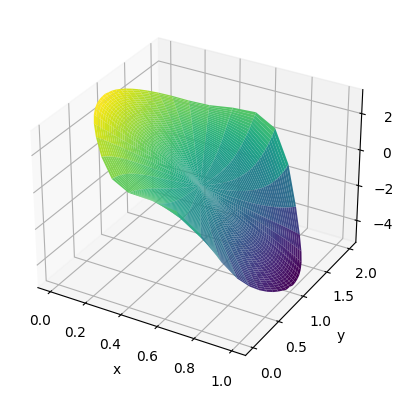

In [37]:
V0 = 2
a = 1
b = 2
V1=3
V2 = -5

def calcR(angle):
  return 1/(np.sqrt((np.cos(angle)/(a/2))**2 + (np.sin(angle)/(b/2))**2))
def stretch_mesh(r, theta):
  return [ r[i] * calcR(theta[i][0]) for i in range(len(r)) ]

theta = np.linspace(0, 2*np.pi, 50)
r = np.linspace(0, 1, 50)

r, theta = np.meshgrid(r, theta)
r1= stretch_mesh(r,theta)



#x = np.linspace(0, a, 30)
#y = np.linspace(0, b, 30)

#X, Y = np.meshgrid(x, y)

def Vn1(n):
  return( V1 + ((-1)**n)*(V0-V1))

def Vn2(n):
  return( V2 + ((-1)**n)*(V0-V2))
def V(x,y):
  n = 100
  R = V0/b
  for i in range(1,n):
    R += (2/np.pi)*(1/(i*np.sinh(i*np.pi*a/b)))*(Vn2(i)*np.sinh(i*np.pi*(x/b))-Vn1(i)*np.sinh((i*np.pi/b)*(x-a)))*np.sin(i*np.pi*y/b)
  return(R)

X = r1 * np.cos(theta) + a/2
Y = r1 * np.sin(theta) + b/2

Z= V(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v')

plt.show()

In [26]:
v = np.zeros((52,52))
#v[:,0] = 1
#v[0,:] = 3

x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)

hx = x[1]-x[0]
hy = y[1]-y[0]

V0 = 2
a = 1
b = 2
V1=3
V2 = -5

v[:,0] = V1
v[:,-1] = V2
v[-1,:] = V0

In [27]:
for i in range(100000):
  v1 = v[1:-1,1:-1]
  vi = v[:-2,1:-1]
  vd = v[2:,1:-1]
  va = v[1:-1,:-2]
  vab = v[1:-1,2:]

  v1 = ((vi+vd)*hy**2 + (va+vab)*hx**2)/(2*(hx**2 + hy**2))

  v[1:-1,1:-1] = v1

In [28]:
X, Y = np.meshgrid(x, y)

Xa = X-a/2
Ya = Y-b/2

ra = np.sqrt(Xa**2 + Ya**2)

cos = Xa/ra
sin = Ya/ra
x2 = (a/2)*cos
y2 = (b/2)*sin

ii1 = np.abs(Xa) <= np.abs(x2)
ii2 = np.abs(Ya) <= np.abs(y2)
ii = ii1*ii2

Z = v[1:-1,1:-1]


Text(0.5, 0, 'v')

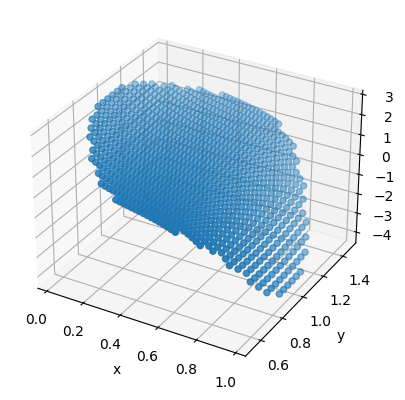

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[ii], Y[ii], Z[ii])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('v')